In [2]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

In [5]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()

obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [6]:
(emission, states) = hmm8.generate_emission(500)


In [ ]:
print(emission)

In [ ]:
def get_syllable_dict():
    f = open('data/syllable_dictionary.txt', 'r')
    counter = 0
    words = {}
    for line in f:
        line = line.split()
        words[counter] = line
        counter += 1
    return words

In [ ]:
lines = []
syllables = 0
count_e = 0
words = get_syllable_dict()
for i in range(14):
    curr_syllables = 0
    print(i)
    line = []
    while curr_syllables < 10:
        print(curr_syllables)
        if emission[count_e] > 3205:
            count_e += 1
            continue
        if len(words[emission[count_e]]) == 3:
            print(words[emission[count_e]][0], words[emission[count_e]][2])
            syllables = int(words[emission[count_e]][2])
        else:
            print(words[emission[count_e]][0], words[emission[count_e]][1])
            syllables = int(words[emission[count_e]][1])
        if (curr_syllables + syllables) > 10:
            count_e += 1
            continue
        else:
            curr_syllables += syllables
            line.append(words[emission[count_e]][0])
            print(words[emission[count_e]][0], count_e)
            line.append(" ")
        count_e += 1
    lines.append(line)

In [ ]:
print(lines)

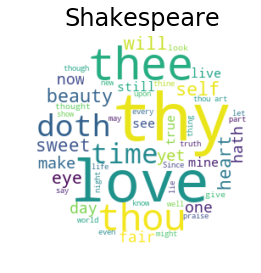

In [4]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

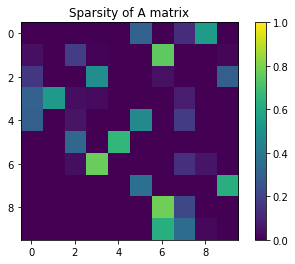

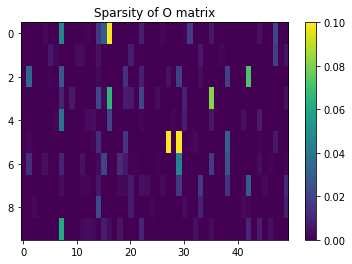

In [7]:
visualize_sparsities(hmm8, O_max_cols=50)

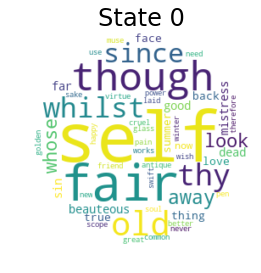

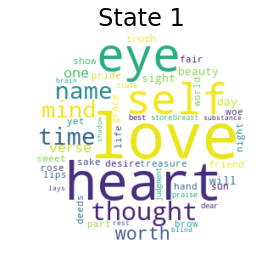

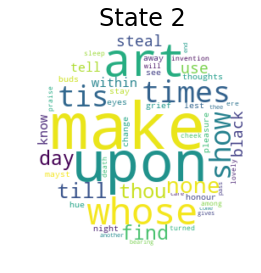

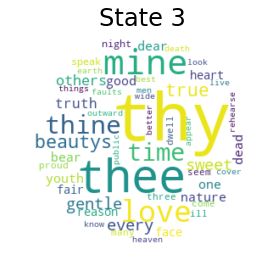

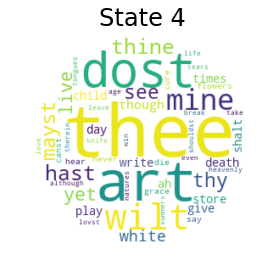

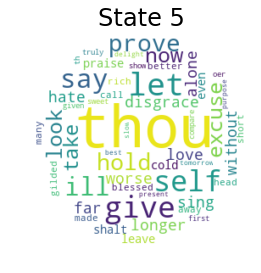

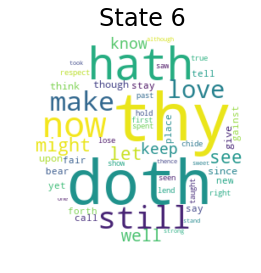

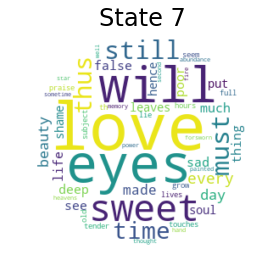

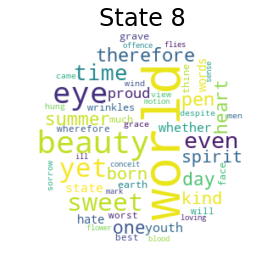

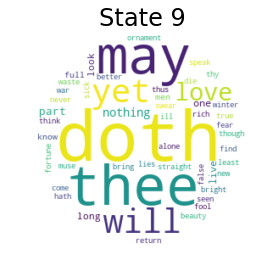

In [8]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

In [9]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())


Animating...
